# 数据分析

In [1]:
import numpy as np
import pandas as pd
import re
import jieba

In [8]:
data=pd.read_csv('job_info2_2.csv',engine="python",encoding="utf-8")
data.head()

,岗位名称,公司名称,要求,工作地点,工资,发布时间,岗位描述,公司类型,公司规模,所属行业
0,Python工程师,中泰信达环保科技（武汉）有限公司,"['武汉-汉阳区', '1年经验', '本科', '招2人', '04-05发布']",武汉-汉阳区,5-8千/月,04-05,技能要求：C/C++，java，Python，python爬虫岗位职责：1、负责Java、C...,民营公司,50-150人,环保
1,初级/中级python开发,深圳市网新新思软件有限公司,"['深圳-罗湖区', '2年经验', '本科', '招3人', '04-05发布']",深圳-罗湖区,1-1.5万/月,04-05,岗位职责：1、本科以上学历，2年及以上Linux环境下相关软件开发工作经验；2、熟练掌握Py...,民营公司,1000-5000人,计算机服务(系统、数据服务、维修)
2,Python/Odoo 软件开发工程师,北京中达讯科技有限公司,"['北京', '5-7年经验', '大专', '招1人', '04-05发布', '计算机科...",北京,15-20万/年,04-05,职位要求：1、大专以上计算机相关专业，2~3年工作经验；2、具备良好的独立分析问题与解决能力...,民营公司,少于50人,"计算机软件,计算机硬件"
3,Python开发工程师,广州五壹工程师信息技术有限公司,"['石家庄', '3-4年经验', '大专', '招1人', '04-05发布']",石家庄,4.5-6千/月,04-05,职责描述： 1. 负责51工程师相关产品开发； 2. 维护所负责的服务模块，并进...,创业公司,少于50人,互联网/电子商务
4,python数据分析师,上海澳马信息技术服务有限公司,"['上海-浦东新区', '2年经验', '本科', '招若干人', '04-05发布']",上海-浦东新区,1-1.5万/月,04-05,岗位职责： 1.负责基于Python系统的开发、维护工作；2.负责数据的深度提取和挖掘、数据...,国企,50-150人,"计算机软件,计算机硬件"


In [9]:
# 为数据框指定行索引
data.index=range(len(data))

In [10]:
# 已经处理
# 为数据框指定列索引
# df.columns=['岗位名称','公司名称','要求','工作地点','工资','发布时间','岗位描述','公司类型','公司规模','所属行业']

In [11]:
data.shape

(3220, 10)

In [13]:
data.drop_duplicates(subset=["岗位名称","公司名称"],inplace=True)

In [15]:
data.shape

(3211, 10)

## 一.岗位名称字段处理

In [21]:
data['岗位名称'].value_counts()

python开发工程师           406
运维工程师                  61
python高级开发工程师          51
软件测试工程师                51
算法工程师                  48
                     ... 
自动化脚本开发                 1
python技术支持              1
linux python开发          1
java中高级开发工程师（股权激励）      1
自动化测试                   1
Name: 岗位名称, Length: 1854, dtype: int64

In [17]:
data['岗位名称']=data['岗位名称'].apply(lambda x:x.lower())

In [32]:
x=list(data['岗位名称'].value_counts().index)[:10]

In [33]:
y=list(data['岗位名称'].value_counts().head(10))

In [28]:
from snapshot_selenium import snapshot as driver

from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.render import make_snapshot

In [29]:
from pyecharts.globals import CurrentConfig,NotebookType

CurrentConfig.NOTEBOOK_TYPE=NotebookType.JUPYTER_LAB

In [42]:
data_pairs=[i for i in zip(x,y)]

In [51]:
import pyecharts.options as opts
from pyecharts.charts import Pie

p=(
    Pie(init_opts=opts.InitOpts(width="1000px", height="600px"))
    .add(
        series_name="工作",
        data_pair=data_pairs,
    )
    #.set_colors(["blue", "green", "yellow", "red", "pink", "orange", "purple",""])
    .set_global_opts(title_opts=opts.TitleOpts(title=""))
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
    #.render("pie_set_color.html")
)

make_snapshot(driver,p.render("Top10_job.html"),"Top10_job.png")

In [52]:
p.load_javascript()
p.render_notebook()

## 二.筛选目标工作

In [70]:
target_job=["算法","开发","数据"]

index=[data["岗位名称"].str.count(i) for i in target_job]
index=np.array(index).sum(axis=0)>0
job_info=data[index]
job_info.shape

(1735, 10)

## 三.岗位名称标准化

In [71]:
# 3、将岗位名称标准化：目前岗位名称太多太杂，需要统一
job_list = ['数据分析', "数据统计","数据专员",'数据挖掘', '算法', '大数据',
            '开发工程师', '运营', '软件工程', '前端开发',
            '深度学习', 'ai', '数据库', '数据库', '数据产品',
            '客服', 'java', '.net', 'andrio', '人工智能', 'c++',
            '数据管理',"测试","运维"]
job_list = np.array(job_list)
def rename(x=None,name_list=job_list):
    index = [i in x for i in name_list]
    if sum(index) > 0:
        return name_list[index][0]
    else:
        return x
job_info["岗位名称"] = job_info["岗位名称"].apply(rename)
job_info["岗位名称"].value_counts()

# 数据统计、数据专员、数据分析统一归为数据分析
# job_info["岗位名"] = job_info["岗位名"].apply(lambda x:re.sub("数据专员","数据分析",x))
# job_info["岗位名"] = job_info["岗位名"].apply(lambda x:re.sub("数据统计","数据分析",x))

E:\Anaconda\envs\mypython\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


开发工程师                               1025
算法                                   207
数据分析                                 150
大数据                                  103
数据库                                   19
                                    ... 
python软件开发师                            1
python开发实习生（创新中心）(j11913)              1
python后端开发主管                           1
数据支持                                   1
数据支持中心经理 (职位编号：beautyfarm000967)       1
Name: 岗位名称, Length: 151, dtype: int64

## 四.工资字段处理

In [72]:
job_info["工资"].str[-1].value_counts()

月    1570
-      91
年      66
天       8
Name: 工资, dtype: int64

In [73]:
job_info["工资"].str[-3].value_counts()

万    1423
千     213
元       8
Name: 工资, dtype: int64

In [74]:
# 说明：工资数据给出的一般是一个范围，数据也很不标准，例如：“千/月、万/月、万/年”等，下面我们做一个统一后，取数据范围的平均值。
# 像结尾是"天"的一般属于兼职，我们也不考虑。直接删除这样的数据。
index1 = job_info["工资"].str[-1].isin(["年","月"])
index2 = job_info["工资"].str[-3].isin(["万","千"])
job_info = job_info[index1 & index2]

In [75]:
job_info.head()

,岗位名称,公司名称,要求,工作地点,工资,发布时间,岗位描述,公司类型,公司规模,所属行业
1,初级/中级python开发,深圳市网新新思软件有限公司,"['深圳-罗湖区', '2年经验', '本科', '招3人', '04-05发布']",深圳-罗湖区,1-1.5万/月,04-05,岗位职责：1、本科以上学历，2年及以上Linux环境下相关软件开发工作经验；2、熟练掌握Py...,民营公司,1000-5000人,计算机服务(系统、数据服务、维修)
2,开发工程师,北京中达讯科技有限公司,"['北京', '5-7年经验', '大专', '招1人', '04-05发布', '计算机科...",北京,15-20万/年,04-05,职位要求：1、大专以上计算机相关专业，2~3年工作经验；2、具备良好的独立分析问题与解决能力...,民营公司,少于50人,"计算机软件,计算机硬件"
3,开发工程师,广州五壹工程师信息技术有限公司,"['石家庄', '3-4年经验', '大专', '招1人', '04-05发布']",石家庄,4.5-6千/月,04-05,职责描述： 1. 负责51工程师相关产品开发； 2. 维护所负责的服务模块，并进...,创业公司,少于50人,互联网/电子商务
4,数据分析,上海澳马信息技术服务有限公司,"['上海-浦东新区', '2年经验', '本科', '招若干人', '04-05发布']",上海-浦东新区,1-1.5万/月,04-05,岗位职责： 1.负责基于Python系统的开发、维护工作；2.负责数据的深度提取和挖掘、数据...,国企,50-150人,"计算机软件,计算机硬件"
5,数据分析,上海功存智能科技有限公司,"['上海-宝山区', '2年经验', '本科', '招若干人', '04-05发布']",上海-宝山区,1.5-2.5万/月,04-05,1. 根据业务要求进行数据分析和数据建模开发；2. 基于应用和业务流程数据进行数据建模，分析...,民营公司,50-150人,计算机软件


In [76]:
def get_money_max_min(x):
    try:
        if x[-3] == "万":
            z = [float(i)*10000 for i in re.findall("[0-9]+\.?[0-9]*",x)]
        elif x[-3] == "千":
            z = [float(i) * 1000 for i in re.findall("[0-9]+\.?[0-9]*", x)]
        if x[-1] == "年":
            z = [i/12 for i in z]
        return z
    except:
        return x

salary = job_info["工资"].apply(get_money_max_min)
job_info["最低工资"] = salary.str[0]
job_info["最高工资"] = salary.str[1]
job_info["工资水平"] = job_info[["最低工资","最高工资"]].mean(axis=1)

In [77]:
job_info.head()

,岗位名称,公司名称,要求,工作地点,工资,发布时间,岗位描述,公司类型,公司规模,所属行业,最低工资,最高工资,工资水平
1,初级/中级python开发,深圳市网新新思软件有限公司,"['深圳-罗湖区', '2年经验', '本科', '招3人', '04-05发布']",深圳-罗湖区,1-1.5万/月,04-05,岗位职责：1、本科以上学历，2年及以上Linux环境下相关软件开发工作经验；2、熟练掌握Py...,民营公司,1000-5000人,计算机服务(系统、数据服务、维修),10000.0,15000.000000,12500.000000
2,开发工程师,北京中达讯科技有限公司,"['北京', '5-7年经验', '大专', '招1人', '04-05发布', '计算机科...",北京,15-20万/年,04-05,职位要求：1、大专以上计算机相关专业，2~3年工作经验；2、具备良好的独立分析问题与解决能力...,民营公司,少于50人,"计算机软件,计算机硬件",12500.0,16666.666667,14583.333333
3,开发工程师,广州五壹工程师信息技术有限公司,"['石家庄', '3-4年经验', '大专', '招1人', '04-05发布']",石家庄,4.5-6千/月,04-05,职责描述： 1. 负责51工程师相关产品开发； 2. 维护所负责的服务模块，并进...,创业公司,少于50人,互联网/电子商务,4500.0,6000.000000,5250.000000
4,数据分析,上海澳马信息技术服务有限公司,"['上海-浦东新区', '2年经验', '本科', '招若干人', '04-05发布']",上海-浦东新区,1-1.5万/月,04-05,岗位职责： 1.负责基于Python系统的开发、维护工作；2.负责数据的深度提取和挖掘、数据...,国企,50-150人,"计算机软件,计算机硬件",10000.0,15000.000000,12500.000000
5,数据分析,上海功存智能科技有限公司,"['上海-宝山区', '2年经验', '本科', '招若干人', '04-05发布']",上海-宝山区,1.5-2.5万/月,04-05,1. 根据业务要求进行数据分析和数据建模开发；2. 基于应用和业务流程数据进行数据建模，分析...,民营公司,50-150人,计算机软件,15000.0,25000.000000,20000.000000


## 五.工资字段处理

In [78]:
address_list = ['北京', '上海', '广州', '深圳', '杭州', '苏州', '长沙',
                '武汉', '天津', '成都', '西安', '东莞', '合肥', '佛山',
                '宁波', '南京', '重庆', '长春', '郑州', '常州', '福州',
                '沈阳', '济南', '宁波', '厦门', '贵州', '珠海', '青岛',
                '中山', '大连','昆山',"惠州","哈尔滨","昆明","南昌","无锡"]
#job_info["工作地点"].value_counts()
address_list = np.array(address_list)

def rename(x=None,name_list=address_list):
    index = [i in x for i in name_list]
    if sum(index) > 0:
        return name_list[index][0]
    else:
        return x
job_info["工作地点"] = job_info["工作地点"].apply(rename)

In [79]:
job_info.head()

,岗位名称,公司名称,要求,工作地点,工资,发布时间,岗位描述,公司类型,公司规模,所属行业,最低工资,最高工资,工资水平
1,初级/中级python开发,深圳市网新新思软件有限公司,"['深圳-罗湖区', '2年经验', '本科', '招3人', '04-05发布']",深圳,1-1.5万/月,04-05,岗位职责：1、本科以上学历，2年及以上Linux环境下相关软件开发工作经验；2、熟练掌握Py...,民营公司,1000-5000人,计算机服务(系统、数据服务、维修),10000.0,15000.000000,12500.000000
2,开发工程师,北京中达讯科技有限公司,"['北京', '5-7年经验', '大专', '招1人', '04-05发布', '计算机科...",北京,15-20万/年,04-05,职位要求：1、大专以上计算机相关专业，2~3年工作经验；2、具备良好的独立分析问题与解决能力...,民营公司,少于50人,"计算机软件,计算机硬件",12500.0,16666.666667,14583.333333
3,开发工程师,广州五壹工程师信息技术有限公司,"['石家庄', '3-4年经验', '大专', '招1人', '04-05发布']",石家庄,4.5-6千/月,04-05,职责描述： 1. 负责51工程师相关产品开发； 2. 维护所负责的服务模块，并进...,创业公司,少于50人,互联网/电子商务,4500.0,6000.000000,5250.000000
4,数据分析,上海澳马信息技术服务有限公司,"['上海-浦东新区', '2年经验', '本科', '招若干人', '04-05发布']",上海,1-1.5万/月,04-05,岗位职责： 1.负责基于Python系统的开发、维护工作；2.负责数据的深度提取和挖掘、数据...,国企,50-150人,"计算机软件,计算机硬件",10000.0,15000.000000,12500.000000
5,数据分析,上海功存智能科技有限公司,"['上海-宝山区', '2年经验', '本科', '招若干人', '04-05发布']",上海,1.5-2.5万/月,04-05,1. 根据业务要求进行数据分析和数据建模开发；2. 基于应用和业务流程数据进行数据建模，分析...,民营公司,50-150人,计算机软件,15000.0,25000.000000,20000.000000


## 六.岗位描述词云分析

In [84]:
import pandas as pd
import jieba
from collections import Counter
import pyecharts.options as opts
from pyecharts.charts import WordCloud

def get_text():
    
    file="job_info2_2.csv"
    
    with open(file,encoding="utf-8") as f:
        
        data=pd.read_csv(f,encoding="utf-8")
        
    text=data["岗位描述"].values.tolist()
    
    text=str(text)[1:-1]
    
    return text


def split_word(text):
    
    word_list=list(jieba.cut(text))
    
    with open("stop_words.txt","r",encoding="utf-8") as f:
        meaningless_word=f.read().splitlines()
        
    result=[]
    
    for i in word_list:
        if i not in meaningless_word:
            result.append(i.replace(" ",""))
            
    return result


def word_counter(words):
    
    words_counter=Counter(words)
    
    words_list=words_counter.most_common(2000)
    
    return words_list
        


def word_cloud(data):
    
    (
        WordCloud()
        .add(
            series_name="描述分析",
            data_pair=data,
            word_size_range=[10,80],
            shape="cursive",
            #mask_image="douban.jpg"
        )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="描述分析",title_textstyle_opts=opts.TextStyleOpts(font_size=23)),
            tooltip_opts=opts.TooltipOpts(is_show=True)
        )
        .render("描述.html")
    )
    


def main():
    
    text=get_text()
    
    words=split_word(text)
    
    data=word_counter(words)
    
    word_cloud(data)
    
    return data

if __name__=="__main__":
    
    datas=main()


In [85]:
w=(
    WordCloud()
    .add(
        series_name="描述分析",
        data_pair=datas,
        word_size_range=[10,80],
        shape="cursive",
        #mask_image="douban.jpg"
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="描述分析",title_textstyle_opts=opts.TextStyleOpts(font_size=23)),
        tooltip_opts=opts.TooltipOpts(is_show=True)
    )
    #.render("描述.html")
)

In [88]:
make_snapshot(driver,w.render("描述-词云.html"),"描述-词云.png")

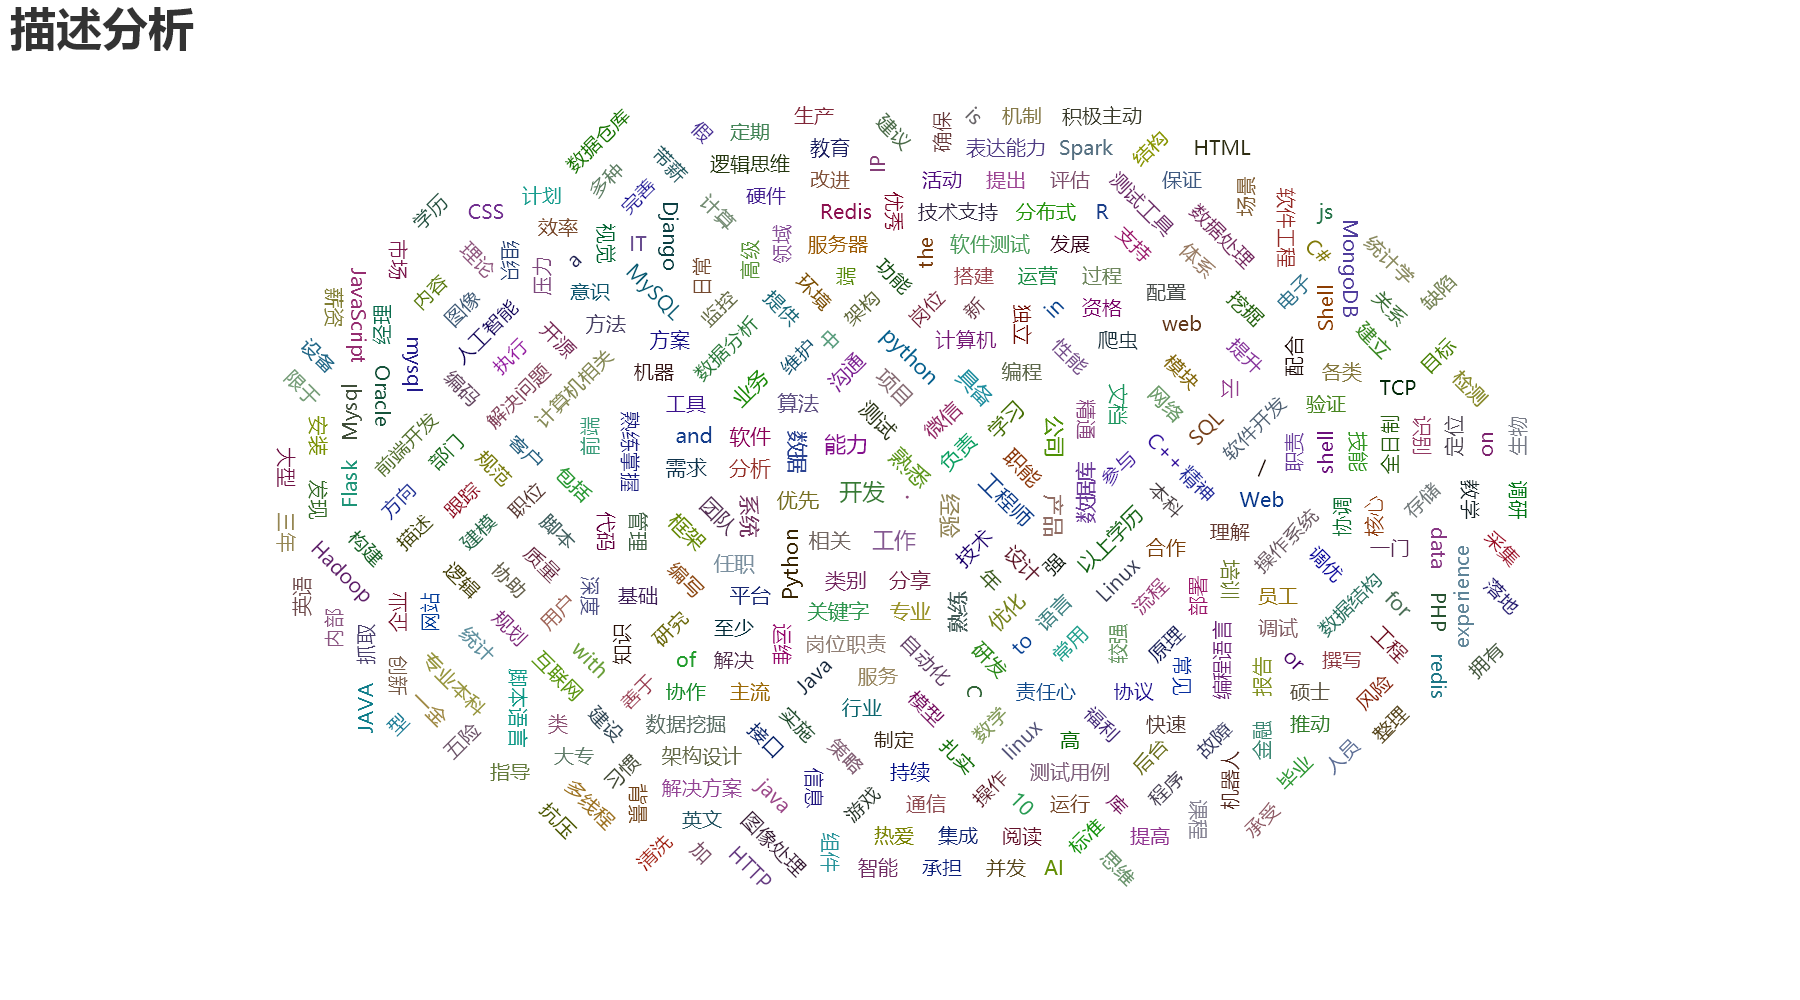

In [89]:
from IPython.display import Image

Image("描述-词云.png",width="1000px",height="600px")

In [90]:
w.load_javascript()
w.render_notebook()